In [20]:
import os.path
import rmgpy
from rmgpy.data.rmg import RMGDatabase
from rmgpy.chemkin import loadSpeciesDictionary
from rmgpy.molecule.resonance import generateAromaticResonanceIsomers
from rmgpy.molecule.molecule import Molecule

In [2]:
temperature = 298

In [3]:
databasePath = rmgpy.settings['database.directory']

database1 = RMGDatabase()
database1.load(
    path = databasePath,
    thermoLibraries = [],
    reactionLibraries = [],
    seedMechanisms = [],
    kineticsFamilies = 'none'
    )

database2 = RMGDatabase()
database2.load(
    path = databasePath,
    thermoLibraries = ['PAHLibrary'],
    reactionLibraries = [],
    seedMechanisms = [],
    kineticsFamilies = 'none'
    )

In [4]:
speciesList1 = loadSpeciesDictionary('/home/mjliu/Documents/PAHThermo/species_dictionary.txt')
speciesList2 = loadSpeciesDictionary('/home/mjliu/Documents/PAHThermo/species_dictionary.txt')

In [5]:
for label, spec in speciesList1.iteritems():
    #amol = generateAromaticResonanceIsomers(spec.molecule[0])
    print spec.molecule[0]
    spec.thermo = database1.thermo.estimateThermoViaGroupAdditivity(spec.molecule[0])
    #spec.thermo = database1.thermo.getThermoData(spec)
    spec.h = spec.thermo.getEnthalpy(temperature) / 1000
    spec.s = spec.thermo.getEntropy(temperature)

<Molecule "C1=CC=C2C(C=CC3C2=CC=C2C=CC=CC=32)=C1">
<Molecule "[C]1C=CC=C2C=CC3=CC=CC=C3C=12">
<Molecule "C1=CC=C2C=C3C=C4C=CC=CC4=CC3=CC2=C1">
<Molecule "C#CC1C=C[C]=CC=1">
<Molecule "C#CC1C=CC=[C]C=1">
<Molecule "C#CC1=[C]C=CC=C1">
<Molecule "C1=CC2=CC=C3C=CC=C4C=CC(=C1)C2=C43">
<Molecule "C#CC1=CC=CC2=CC=C3C=CC=CC3=C12">
<Molecule "C#CC1C=CC=CC=1">
<Molecule "C#CC1=CC2C=CC3=CC=CC(=C1C#C)C=23">
<Molecule "C#CC1=CC=CC2=CC=CC=C12">
<Molecule "C#CC1=CC=C2C=CC=CC2=C1">
<Molecule "C1=CC=CC=C1">
<Molecule "[C]1=CC=C2C=CC3=CC4=CC=CC=C4C1=C23">
<Molecule "C1=CC=C2C=CC=CC2=C1">
<Molecule "C1=CC2=CC=CC3C4=CC=CC5=CC=CC(C(=C1)C=32)=C54">
<Molecule "[C]1=CC=CC=C1">
<Molecule "C#CC1=CC=C2C=CC3=CC=CC1=C32">
<Molecule "C=CC1=CC=C2C=CC3=CC=CC1=C32">
<Molecule "[CH]=CC1=CC=CC2=CC=C3C=CC=CC3=C12">
<Molecule "C1=CC=C(C=C1)C1C=CC=CC=1">
<Molecule "C=[C]C1C=CC=CC=1">
<Molecule "[C]1=CC=C2C=CC3C=CC=C1C=32">
<Molecule "[CH]=CC1=CC=C2C=CC3=CC=CC1=C32">
<Molecule "[C]1=CC=C2C=CC=CC2=C1">
<Molecule "[C]1C=CC=C2

In [6]:
#for label, spec in speciesList1.iteritems():
#    print label + ' : ' + str(len(spec.molecule))

In [7]:
for label, spec in speciesList2.iteritems():
    spec.thermo = database2.thermo.getThermoData(spec)
    spec.h = spec.thermo.getEnthalpy(temperature) / 1000
    spec.s = spec.thermo.getEntropy(temperature)

In [8]:
labels = []
gavEnthalpy = []
gavEntropy = []
calcEnthalpy = []
calcEntropy = []

for label in speciesList1.keys():
    labels.append(label)
    
    gavEnthalpy.append(speciesList1[label].h)
    gavEntropy.append(speciesList1[label].s)

    calcEnthalpy.append(speciesList2[label].h)
    calcEntropy.append(speciesList2[label].s)

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

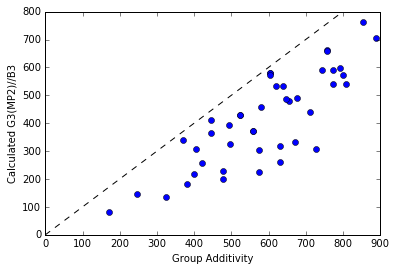

In [10]:
plt.plot(gavEnthalpy, calcEnthalpy, 'bo')
plt.plot([0, 800], [0, 800], 'k--')
plt.xlabel('Group Additivity')
plt.ylabel('Calculated G3(MP2)//B3')
plt.show()

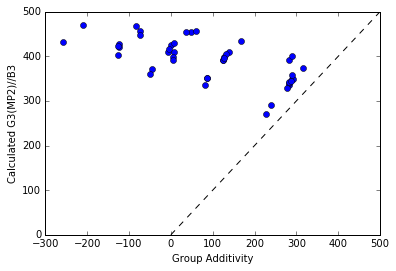

In [11]:
plt.plot(gavEntropy, calcEntropy, 'bo')
plt.plot([0, 500], [0, 500], 'k--')
plt.xlabel('Group Additivity')
plt.ylabel('Calculated G3(MP2)//B3')
plt.show()

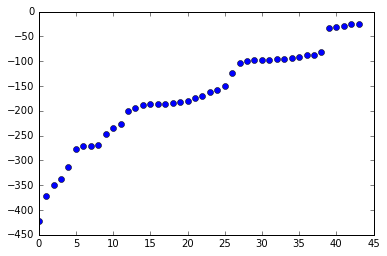

In [12]:
hDiff = np.subtract(calcEnthalpy,gavEnthalpy)
plt.plot(np.sort(hDiff),'bo')
plt.show()

In [24]:
rings = []
for label in labels:
    SSSR = speciesList1[label].molecule[0].getSmallestSetOfSmallestRings()
    rings.append(len(SSSR))
print zip(labels, rings)

[('A4c', 4), ('A3p-', 3), ('A4t', 4), ('A1C2H-4', 1), ('A1C2H-3', 1), ('A1C2H-2', 1), ('A4p', 4), ('A3pC2H', 3), ('A1C2H', 1), ('A2R5(C2H)2', 3), ('A2C2HA', 2), ('A2C2HB', 2), ('A1', 1), ('A3R5-', 4), ('A2', 2), ('A5', 5), ('A1-', 1), ('A2R5C2H', 3), ('A2R5C2H3', 3), ('A3pC2H2', 3), ('P2', 2), ('i-A1C2H2', 1), ('A2R5-', 3), ('A2R5C2H2', 3), ('A2-2', 2), ('A2-1', 2), ('A2C2HB-', 2), ('A2R5C2H-', 3), ('A4p-', 4), ('A1(C2H)2', 1), ('A2C2H2', 2), ('A2C2H3', 2), ('A3p', 3), ('P2-', 2), ('A2C2HA-', 2), ('n-A1C2H2', 1), ('A2R5', 3), ('A2(C2H)2', 2), ('A3R5', 4), ('A1C2H3', 1), ('A4R5', 5), ('A3R5C2H', 4), ('A3a', 3), ('A1C2H3-2', 1)]


In [46]:
print labels

['A4c', 'A3p-', 'A4t', 'A1C2H-4', 'A1C2H-3', 'A1C2H-2', 'A4p', 'A3pC2H', 'A1C2H', 'A2R5(C2H)2', 'A2C2HA', 'A2C2HB', 'A1', 'A3R5-', 'A2', 'A5', 'A1-', 'A2R5C2H', 'A2R5C2H3', 'A3pC2H2', 'P2', 'i-A1C2H2', 'A2R5-', 'A2R5C2H2', 'A2-2', 'A2-1', 'A2C2HB-', 'A2R5C2H-', 'A4p-', 'A1(C2H)2', 'A2C2H2', 'A2C2H3', 'A3p', 'P2-', 'A2C2HA-', 'n-A1C2H2', 'A2R5', 'A2(C2H)2', 'A3R5', 'A1C2H3', 'A4R5', 'A3R5C2H', 'A3a', 'A1C2H3-2']


In [47]:
sextets = [2,2,1,1,1,1,2,2,1,1,1,1,1,2,1,2,1,1,1,2,2,1,1,1,1,1,1,1,2,1,1,1,2,2,1,1,1,1,2,1,2,2,1,1]
dbonds = [3,1,6,0,0,0,2,1,0,2,2,2,0,1,2,4,0,2,2,1,0,0,2,2,2,2,2,2,2,0,2,2,1,0,2,0,2,2,1,0,2,1,4,0]

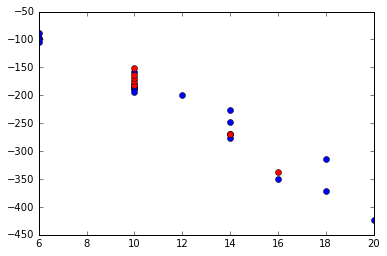

In [68]:
plt.plot(np.multiply(benzsextet,6.)+np.multiply(benzdbonds,2.),benz,'bo')
plt.plot(np.multiply(cpdlsextet,6.)+np.multiply(cpdldbonds,2.),cpdl,'ro')
plt.show()

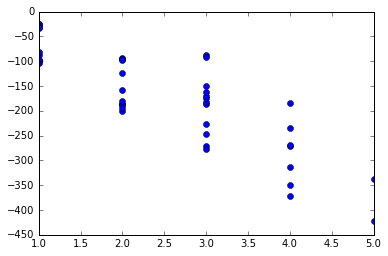

In [40]:
plt.plot(rings,hDiff,'bo')
plt.show()

In [57]:
benz = []
benzring = []
benzsextet = []
benzdbonds = []
cpdl = []
cpdlring = []
cpdlsextet = []
cpdldbonds = []
rbenz = []
rbenzring = []
rbenzsextet = []
rbenzdbonds = []
rcpdl = []
rcpdlring = []
rcpdlsextet = []
rcpdldbonds = []

for index, label in enumerate(labels):
    if 'R5' in label:
        if '-' in label:
            rcpdl.append(hDiff[index])
            rcpdlring.append(rings[index])
            rcpdlsextet.append(sextets[index])
            rcpdldbonds.append(dbonds[index])
        else:
            cpdl.append(hDiff[index])
            cpdlring.append(rings[index])
            cpdlsextet.append(sextets[index])
            cpdldbonds.append(dbonds[index])
    elif '-' in label:
        rbenz.append(hDiff[index])
        rbenzring.append(rings[index])
        rbenzsextet.append(sextets[index])
        rbenzdbonds.append(dbonds[index])
    else:
        benz.append(hDiff[index])
        benzring.append(rings[index])
        benzsextet.append(sextets[index])
        benzdbonds.append(dbonds[index])

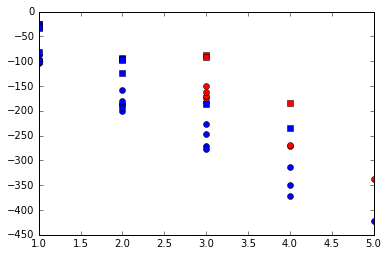

In [56]:
plt.plot(benzring,benz,'bo')
plt.plot(cpdlring,cpdl,'ro')
plt.plot(rbenzring,rbenz,'bs')
plt.plot(rcpdlring,rcpdl,'rs')
plt.show()

In [14]:
np.mean(np.absolute(np.subtract(calcEnthalpy,gavEnthalpy)))

170.30696961487376

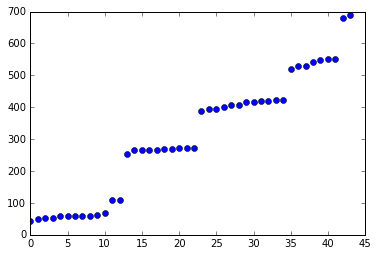

In [15]:
sDiff = np.subtract(calcEntropy,gavEntropy)
plt.plot(np.sort(sDiff),'bo')
plt.show()

In [37]:
benzs = []
cpdls = []
rbenzs = []
rcpdls = []

for index, label in enumerate(labels):
    if 'R5' in label:
        if '-' in label:
            rcpdls.append(sDiff[index])
        else:
            cpdls.append(sDiff[index])
    elif '-' in label:
        rbenzs.append(sDiff[index])
    else:
        benzs.append(sDiff[index])

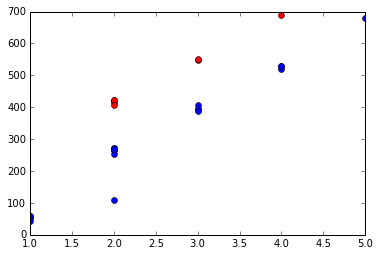

In [41]:
plt.plot(benzring,benzs,'bo')
plt.plot(cpdlring,cpdls,'ro')
#plt.plot(rbenzring,rbenz,'bs')
#plt.plot(rcpdlring,rcpdl,'rs')
plt.show()